In [1]:
# Necessary imports

import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = '../Data/GDC_Data'

In [3]:
'''
Making a dictionary where each key is the Case ID, and the value
is a list of the files associated with each patient.
'''
with open('../Data/GDC_Metadata.json') as file:
    json_string = file.readlines()
    json_string = ''.join(json_string)
metadata = json.loads(json_string)

# Dictionary of Case IDs
case_id_dict = {}

# For each entry in the metadata from the json file
for entry in metadata:
    
    # Getting the case ID
    case_id = entry['associated_entities'][0]['case_id']
    # Getting the associated file name
    file_name = entry['file_name']
    
    # If the Case ID is already in the dictionary, add the file
    # name to the list of values
    if case_id in case_id_dict:
        case_id_dict[case_id].append(file_name)
    # If not already in the dictionary, add new key and value
    else:
        case_id_dict[case_id] = [file_name]

In [4]:
#Remove patients that don't have both miRNA and mRNA data
# List of Case IDs that have the right number of files
tumor_case_ids = []

# For each Case ID
for key in case_id_dict:
    # If they have 2 files, add them to the list of files to use
    if len(case_id_dict[key]) == 2:
        tumor_case_ids.append(key)

In [5]:
#collect miRNA expression data for miRNA 98 for histogram plot
cases = tumor_case_ids  #[0:num_patients]

mirna_98_data=[]
mirna_cancer= np.empty((0, 1881))
# For each patient
for case in cases:
    # Get their case files
    case_files = case_id_dict[case]
    for file in case_files:
        # Get the microRNA file
        if file[-1] == 't':
            case_file_mrna = path + file
            # Load the microRNA file as an array
            mrnas = np.loadtxt(case_file_mrna, dtype='str')
            # Removing the column titles
            mrnas = np.delete(mrnas, 0, 0)
            # Getting the counts of the miRNA 98 
            mrna_df= pd.DataFrame(mrnas)
            index= mrna_df.index[mrna_df[0]=='hsa-mir-98'].tolist()
            mir_98_count_series= mrna_df.iloc[index, 1]
            mir_98_count= mir_98_count_series.item()
            # append to list of counts 
            mirna_98_data.append(mir_98_count)
            

KeyboardInterrupt: 

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


Text(0.5, 1.0, 'Histogram of MiRNA hsa-mir-98 Read Counts')

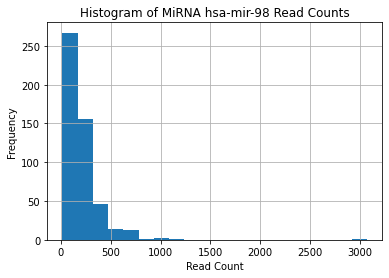

In [75]:
#Convert data list to list of integers
mirna_98_data=[int(i) for i in mirna_98_data]

#Create histogram of read counts for hsa-mir-98
plt.hist(mirna_98_data, bins=20)
plt.grid(True)
plt.xlabel('Read Count')
plt.ylabel('Frequency')
plt.title("Histogram of MiRNA hsa-mir-98 Read Counts")

In [25]:
#make matrix of miRNA expression data for tumor samples
cases = tumor_case_ids  

mirna_cancer= np.empty((0, 1881))
# For each patient
for case in cases:
    # Get their case files
    case_files = case_id_dict[case]
    for file in case_files:
        # Get the microRNA file
        if file[-1] == 't':
            case_file_mrna = path + file
            # Load the microRNA file as an array
            mrnas = np.loadtxt(case_file_mrna, dtype='str')
            # Removing the column titles
            mrnas = np.delete(mrnas, 0, 0)
            col_num= len(mrnas[:,1])
            reads= np.reshape(mrnas[:,1], (1, col_num))
            mirna_cancer= np.append(mirna_cancer, reads, axis=0)
                

In [37]:
#Make matrix of mRNA for tumor samples 
cases=tumor_case_ids[0:1]
mrna_cancer= np.empty((0,60483))
# For each patient
for case in cases:
    # Get their case files
    case_files = case_id_dict[case]
    for file in case_files:
        # Get the mRNA file
        if file[-1] == 'z':
            case_file_mrna = path + file
            # Load the microRNA file as an array
            mrnas = np.loadtxt(case_file_mrna, dtype='str')
            col_num= len(mrnas[:,1])
            reads= np.reshape(mrnas[:,1], (1, col_num))
            mrna_cancer= np.append(mrna_cancer, reads, axis=0)

In [18]:
#Create matrix of mirna data for normal tissue samples
normal_miRNA= np.empty((0,1881))
path_normal = '../Data/GDC_Normal_Data/'
import os
for filename in os.listdir(path_normal):
   if filename[-1] == 't':
      #print(filename)
      filepath= path_normal + filename
      mrnas = np.loadtxt(filepath, dtype='str')
      mrnas = np.delete(mrnas, 0, 0)
      col_num= len(mrnas[:,1])
      reads= np.reshape(mrnas[:,1], (1, col_num))
      normal_miRNA= np.append(normal_miRNA, reads, axis=0)
      
         

316b1936-e040-4ea3-8346-d00b2b98cf0a.mirbase21.mirnas.quantification.txt
172d7b93-7598-474d-ba9b-adab46559176.mirbase21.mirnas.quantification.txt
4f80ab99-6719-4626-92bc-c90a1b1ed724.mirbase21.mirnas.quantification.txt
39dab348-19b4-40df-bb1d-081d251f6e3e.mirbase21.mirnas.quantification.txt
584b3d24-e4b7-44e0-b005-babd0fefa9b0.mirbase21.mirnas.quantification.txt
86f15dc2-5cd0-4c70-ab8a-31c039a964fc.mirbase21.mirnas.quantification.txt
7e26df57-482c-4bd6-bd8c-4ecd4dea8788.mirbase21.mirnas.quantification.txt
3f83180f-149c-495b-ae4b-de93542fd21c.mirbase21.mirnas.quantification.txt
aa989d18-ba34-4085-87a6-3e56ba68c193.mirbase21.mirnas.quantification.txt
17734bbe-d8b7-43d8-abe1-9fad8468c264.mirbase21.mirnas.quantification.txt
8740ca44-992a-4b58-b35f-0442f3ec2851.mirbase21.mirnas.quantification.txt
6520f3db-0e25-4dac-8aae-d96da9712d85.mirbase21.mirnas.quantification.txt
61fcb71c-2425-4514-85f7-7f1e63c9faab.mirbase21.mirnas.quantification.txt
91151f2d-1b98-4671-8e79-05e07931e325.mirbase21.mirn

In [54]:
#make matrix of normal mRNA data
normal_mRNA= np.empty((0,60483))
path_normal = '../Data/GDC_Normal_Data/'
import os
for filename in os.listdir(path_normal):
   #open only the mRNA files
   if filename[-1] == 'z':
      #print(filename)
      filepath= path_normal + filename
      mrnas = np.loadtxt(filepath, dtype='str')
      col_num= len(mrnas[:,1])
      reads= np.reshape(mrnas[:,1], (1, col_num))
      normal_mRNA= np.append(normal_mRNA, reads, axis=0)
      # Removing the column titles
      #mrnas = np.delete(mrnas, 0, 0)

In [11]:
#Use an example file to get list of miRNA names
ex_file="0b9ec0ab-16db-4d45-bb15-0e37f6b666a1.mirbase21.mirnas.quantification.txt"
path_normal = '../Data/GDC_Normal_Data/'
filepath= path_normal + ex_file
ex_data=np.loadtxt(filepath, dtype='str')
print(ex_data[:,0])
ex_data = np.delete(ex_data, 0, 0)
gene_names= np.reshape(ex_data[:,0], (1881,1))
print(gene_names)

['miRNA_ID' 'hsa-let-7a-1' 'hsa-let-7a-2' ... 'hsa-mir-98' 'hsa-mir-99a'
 'hsa-mir-99b']
[['hsa-let-7a-1']
 ['hsa-let-7a-2']
 ['hsa-let-7a-3']
 ...
 ['hsa-mir-98']
 ['hsa-mir-99a']
 ['hsa-mir-99b']]


In [33]:
#Make transposed matrix of miRNA for normal and tumor for DESeq input with ID headers and gene names as first column 
#open normal data
 
normal_miRNA= np.empty((1881, 0))
path_normal = '../Data/GDC_Normal_Data/'
#extract gene names from example file and add as first column
file_example='fda26b22-b0f8-498a-b627-f105d010f051.mirbase21.mirnas.quantification.txt'
filepath_ex= path_normal + file_example
mrnas = np.loadtxt(filepath_ex, dtype='str')
mrnas = np.delete(mrnas, 0, 0)
gene_names= np.reshape(mrnas[:,0], (1881,1))
#print(gene_names)
headers=[]
headers.append('miRNA')
normal_miRNA= np.append(normal_miRNA, gene_names, axis=1)
import os
ID_counter=1
for filename in os.listdir(path_normal):
   if filename[-1] == 't':
      #print(filename)
      filepath= path_normal + filename
      mrnas = np.loadtxt(filepath, dtype='str')
      mrnas = np.delete(mrnas, 0, 0)
      col_num= len(mrnas[:,1])
      reads= np.reshape(mrnas[:,1], (col_num, 1))
      normal_miRNA= np.append(normal_miRNA, reads, axis=1)
      counter_str= str(ID_counter)
      Id_name='ID '+counter_str
      headers.append(Id_name)
      ID_counter+=1
      # Removing the column titles
      #mrnas = np.delete(mrnas, 0, 0)

#Repeat for tumor 
cases = tumor_case_ids  #[0:num_patients]

mirna_cancer= np.empty((1881,0))
# For each patient
for case in cases:
    # Get their case files
    case_files = case_id_dict[case]
    for file in case_files:
        # Get the microRNA file
        if file[-1] == 't':
            case_file_mrna = path + file
            # Load the microRNA file as an array
            mrnas = np.loadtxt(case_file_mrna, dtype='str')
            # Removing the column titles
            mrnas = np.delete(mrnas, 0, 0)
            col_num= len(mrnas[:,1])
            reads= np.reshape(mrnas[:,1], (col_num,1))
            mirna_cancer= np.append(mirna_cancer, reads, axis=1)
            counter_str= str(ID_counter)
            Id_name='ID '+counter_str
            headers.append(Id_name)
            ID_counter+=1

#concatenate normal and tumor data
mirna_combined= np.concatenate((normal_miRNA, mirna_cancer), axis=1)
Ids= range(len(mirna_combined[1,:]))

miRNA_df= pd.DataFrame(mirna_combined, columns= headers)
#miRNA_df.to_csv('miRNA_counts.csv', index=False, header=True, sep=',')

#create matrix of ids and phenotype
headers.remove(headers[0])
ids= np.reshape(headers, (len(headers),1))
pheno=[]
for i in range(len(normal_miRNA[1,:])-1):
    pheno.append('normal')
for j in range(len(mirna_cancer[1,:])):
    pheno.append('tumor')
pheno= np.reshape(pheno, (len(pheno), 1))
headers=['Id', 'Phenotype']
pheno_id= np.concatenate((ids, pheno), axis=1)
pheno_df= pd.DataFrame(pheno_id, columns=headers)

#pheno_df.to_csv('miRNA_pheno.csv',index=False, index=True, sep=',' )

In [36]:
miRNA_df.to_csv('miRNA_counts_v2.csv', index=False, header=True, sep=',')
pheno_df.to_csv('miRNA_pheno_v2.csv',index=False, header=True, sep=',' )